<div align="center">
МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ<br>
ІНСТИТУТ ПРИКЛАДНОГО СИСТЕМНОГО АНАЛІЗУ<br>
НАЦІОНАЛЬНОГО ТЕХНІЧНОГО УНІВЕРСИТЕТУ УКРАЇНИ<br>
«КИЇВСЬКИЙ ПОЛІТЕХНІЧНИЙ ІНСТИТУТ»<br>
КАФЕДРА МАТЕМАТИЧНИХ МЕТОДІВ СИСТЕМНОГО АНАЛІЗУ<br>
</div>
<br><br><br><br><br><br><br><br>
<div align="center"><strong>Звіт з виконання завдань</strong></div>
<div align="center"><strong>комп'ютерного практикуму №8</strong></div>
<div align="center">"Форкаст"</div>
<div align="center">з кредитного модуля "Багатовимірний статистичний аналіз"</div>
<div align="center">Варіант 67</div>
<br><br><br><br>
<div align="right">
    <strong>Виконала:</strong><br>
    Студентка групи КА-02<br>
    Шапошнікова С. В.<br><br>
    <strong>Прийняла:</strong><br>
    Ірина Джигирей
</div>
<br><br><br><br><br><br><br>
<div align="center">Київ - 2022</div>


<hr>

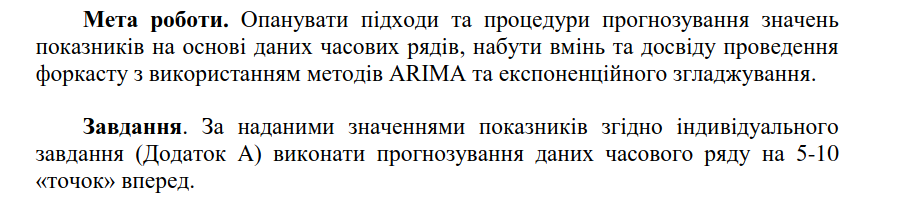

Підключимо небхідні бібліотеки:

In [1]:
# Підключимо бібліотеки для роботи з математичними обчисленнями та масивами даних
import numpy as np
import scipy as sci
# Підключимо бібліотеку для роботи з табличними даними
import pandas as pd
# Підключимо бібліотеки для побудови графіків
import seaborn as sns
import matplotlib.pyplot as plt
# Підключимо функціонал для стандартизації даних з бібліотеки sklearn
from sklearn.preprocessing import StandardScaler
# Підключимо функціонал для обчислення всіх можливих комбінацій масиву
from itertools import combinations

Завантажимо набір даних:

In [2]:
xls = pd.ExcelFile(r"SP.DYN.LE00.IN19602020.xlsx")

In [3]:
#0 - це номер листа+1 таблиці xlsx, який плануємо зчитати
df = xls.parse(0)

In [4]:
df.columns = ["Year"] + list(df.iloc[0])[1:]
df = df.drop(0)
df = df.set_index(["Year"])

In [5]:
# Виведемо перші 10 рядків таблиці
df.head(10)

,ABW,AFE,AFG,AFW,AGO,ALB,ARB,ARE,ARG,ARM,...,VEN,VIR,VNM,VUT,WLD,WSM,YEM,ZAF,ZMB,ZWE
Year,,,,,,,,,,,,,,,,,,,,,
1960.0,65.662,42.716053,32.446,37.20538,37.524,62.283,46.546909,51.537,65.055,65.972,...,59.831,66.224854,59.039,48.975,52.581916,56.902,29.919,48.406,46.687,53.019
1961.0,66.074,43.166935,32.962,37.632546,37.811,63.301,47.14162,52.56,65.176,66.403,...,60.377,66.487976,59.72,49.498,53.075105,57.188,30.163,48.777,47.084,53.483
1962.0,66.444,43.60399,33.471,38.052612,38.113,64.19,47.731782,53.573,65.269,66.838,...,60.907,66.741098,60.387,50.031,53.49242,57.472,30.5,49.142,47.446,53.946
1963.0,66.787,44.025617,33.971,38.463746,38.43,64.914,48.320433,54.572,65.348,67.277,...,61.422,66.99622,61.02,50.576,54.017514,57.756,30.943,49.509,47.772,54.403
1964.0,67.113,44.432721,34.463,38.867073,38.76,65.463,48.910019,55.555,65.426,67.716,...,61.923,67.260366,61.581,51.131,54.687504,58.045,31.501,49.888,48.068,54.849
1965.0,67.435,44.826919,34.948,39.264841,39.102,65.85,49.496477,56.523,65.518,68.153,...,62.416,67.540512,61.963,51.694,55.346907,58.34,32.175,50.284,48.351,55.274
1966.0,67.762,45.213048,35.43,39.662762,39.454,66.11,50.072949,57.482,65.64,68.588,...,62.91,67.835122,62.037,52.259,56.078453,58.642,32.96,50.705,48.643,55.671
1967.0,68.095,45.594294,35.914,40.066408,39.813,66.304,50.634412,58.432,65.796,69.016,...,63.409,68.138195,61.767,52.819,56.783745,58.951,33.836,51.148,48.96,56.034
1968.0,68.436,45.974059,36.403,40.482832,40.178,66.487,51.182099,59.375,65.989,69.427,...,63.916,68.442732,61.186,53.372,57.386244,59.266,34.78,51.615,49.313,56.362


In [6]:
df.shape

(61, 237)

### Завдання 1.
Обрати два стовпці з номера n та n+100, де n – індивідуальний варіант. В нашому випадку це стовпці 67 та 167

In [7]:
df.columns[67], df.columns[167]

('EUU', 'PER')

In [8]:
data_cols = df[['EUU', 'PER']]
data_cols 

,EUU,PER
Year,,
1960.0,69.020867,48.012
1961.0,69.412212,48.628
1962.0,69.318362,49.224
1963.0,69.612852,49.792
1964.0,70.030843,50.334
...,...,...
2016.0,80.949865,76.044
2017.0,80.930839,76.286
2018.0,81.027024,76.516


### Завдання 2.
Побудувати графік динаміки рядів для обраних стовпців

<AxesSubplot: title={'center': 'Очікувана тривалість життя'}, xlabel='Year'>

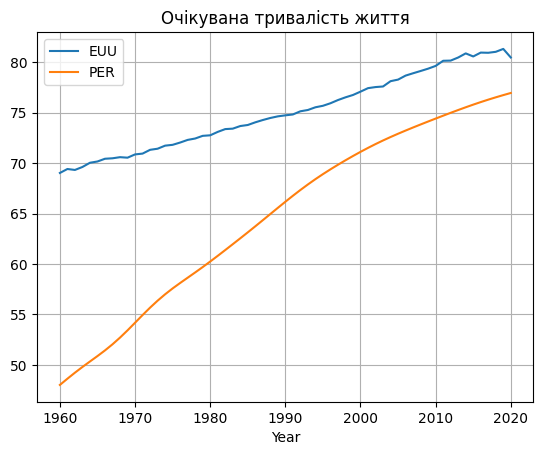

In [9]:
data_cols.plot(title = 'Очікувана тривалість життя', grid = True)

### Завдання 3.
Побудувати:
- Описові статистики
- Графіки автокореляції
- Графіки часткової автокореляції

In [10]:
data_cols.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 61 entries, 1960.0 to 2020.0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   EUU     61 non-null     object
 1   PER     61 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [11]:
data_cols = data_cols.astype('float64')

Описові статистики:

In [12]:
data_cols.describe()

,EUU,PER
count,61.000000,61.000000
mean,75.077490,64.789164
std,3.760231,8.977993
min,69.020867,48.012000
25%,71.807843,57.575000
50%,74.730663,66.165000
75%,78.272641,72.908000
max,81.313270,76.947000


Корелограма:

In [13]:
from statsmodels.graphics import tsaplots

Графік автокореляції для EUU:

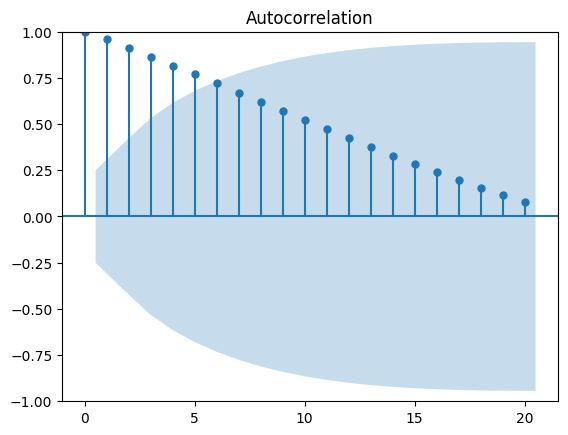

In [14]:
fig = tsaplots.plot_acf(data_cols['EUU'], lags=20)
plt.show()

Графік часткової автокореляції для EUU:

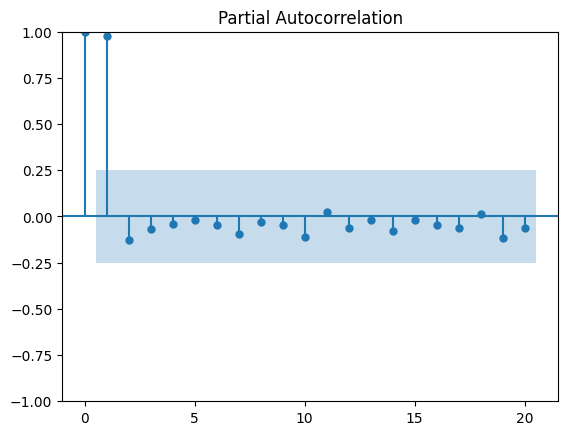

In [25]:
tsaplots.plot_pacf(data_cols['EUU'], lags=20)
plt.show()

Графік автокореляції для PER:

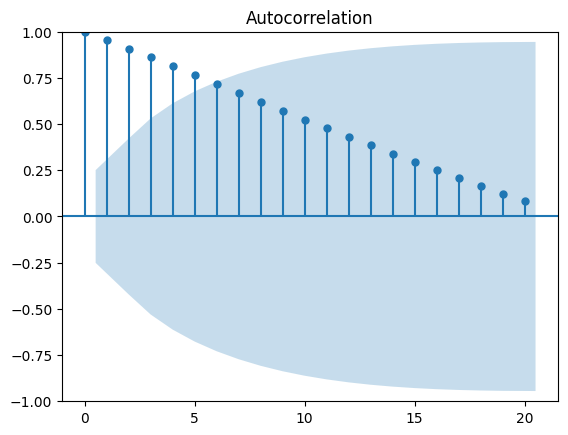

In [16]:
fig = tsaplots.plot_acf(data_cols['PER'], lags=20)
plt.show()

Графік часткової автокореляції для PER:

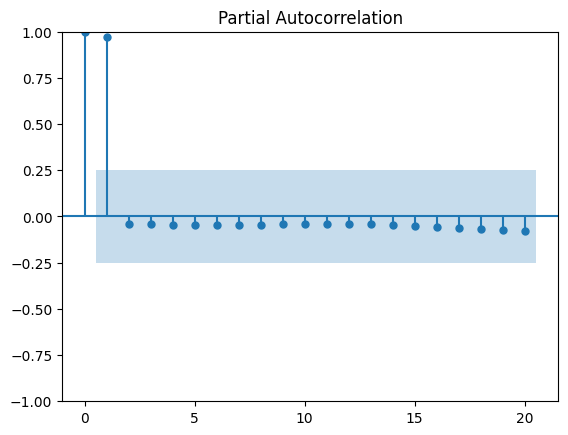

In [17]:
tsaplots.plot_pacf(data_cols['PER'], lags=20)
plt.show()

### Завдання 4.
Побудувати згладжені графіки часових рядів. В електронний звіт додати два згладжені графіки рядів
динаміки

In [18]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

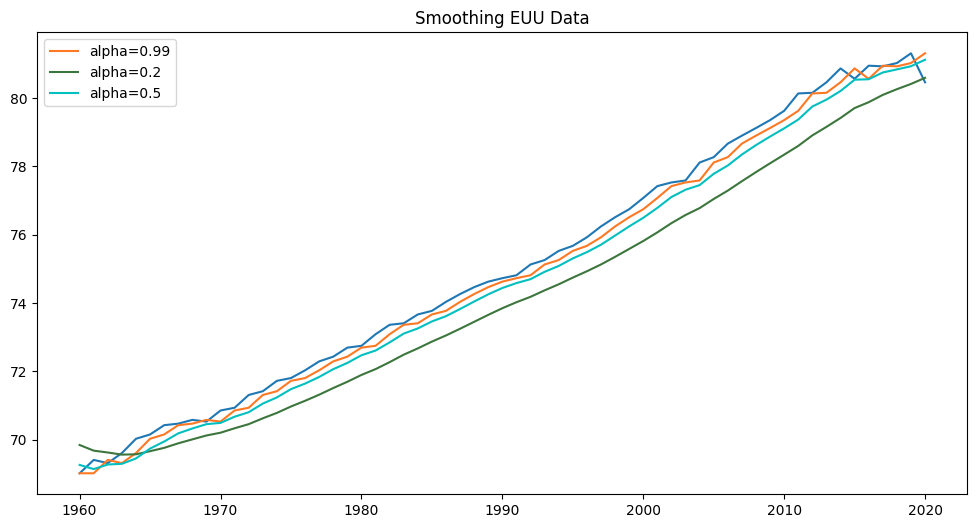

In [19]:
model = SimpleExpSmoothing(np.asarray(data_cols['EUU']))

fit1 = model.fit()
pred1 = fit1.forecast(9)
fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast(9)
fit3 = model.fit(smoothing_level=.5)
pred3 = fit3.forecast(9)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_cols.index, data_cols['EUU'])
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(data_cols.index, f.fittedvalues, label="alpha="+str(f.params['smoothing_level'])[:4], color=c)
plt.title("Smoothing EUU Data")    
plt.legend();

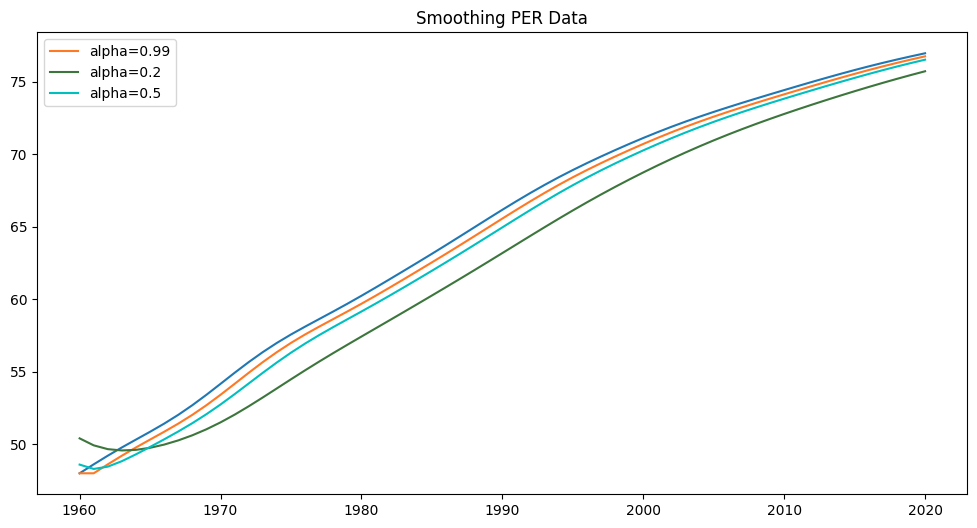

In [31]:
model = SimpleExpSmoothing(np.asarray(data_cols['PER']))

fit1 = model.fit()
pred1 = fit1.forecast(9)
fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast(9)
fit3 = model.fit(smoothing_level=.5)
pred3 = fit3.forecast(9)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_cols.index, data_cols['PER'])
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(data_cols.index, f.fittedvalues, label="alpha="+str(f.params['smoothing_level'])[:4], color=c)
plt.title("Smoothing PER Data")    
plt.legend();

### Завдання 5.
- На основі корелограм отриманих в п. 3 запропонувати параметри p та q моделі ARIMA 
- Отримати форкаст від 5 до 10 значень показника та побудувати графік ряду разом з прогнозованими значеннями 

В електронний звіт додати результати оцінювання параметрів моделі та графік
часового ряду разом з прогнозованими значеннями

Оскільки на графіку автокореляції можемо спостерігати викид на перших двох лагах та відсутність кореляції на всіх інших, то робимо висновки, що p=2, q=0

Форкаст для **EUU**

In [22]:
from statsmodels.tsa.arima.model import ARIMA

In [52]:
model = ARIMA(data_cols['EUU'], order=(1, 0, 1)) #p=1, q=0, d=1
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    EUU   No. Observations:                   61
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  -8.362
Date:                Fri, 13 Jan 2023   AIC                             24.723
Time:                        01:22:42   BIC                             33.166
Sample:                             0   HQIC                            28.032
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.5930      5.292     14.095      0.000      64.220      84.966
ar.L1          0.9982      0.010     98.597      0.000       0.978       1.018
ma.L1          0.2624      0.178      1.477      0.1

In [53]:
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima

In [54]:
f = Forecaster(y=data_cols['EUU'], current_dates=data_cols.index)
f

Forecaster(
    DateStartActuals=1970-01-01T00:00:00.000001960
    DateEndActuals=1970-01-01T00:00:00.000002020
    Freq=N
    N_actuals=61
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

Будемо робити форкаст на 15 років 

In [59]:
f.generate_future_dates(15) 

In [61]:
f.set_test_length(.2) # 20% test set
f.set_estimator('arima') # set arima
f.manual_forecast(call_me='arima1') # forecast with arima

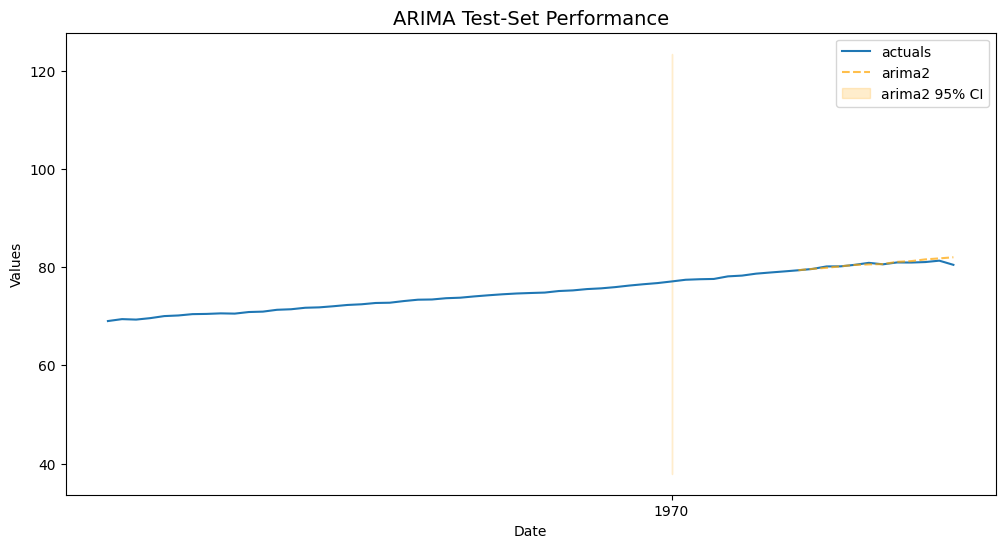

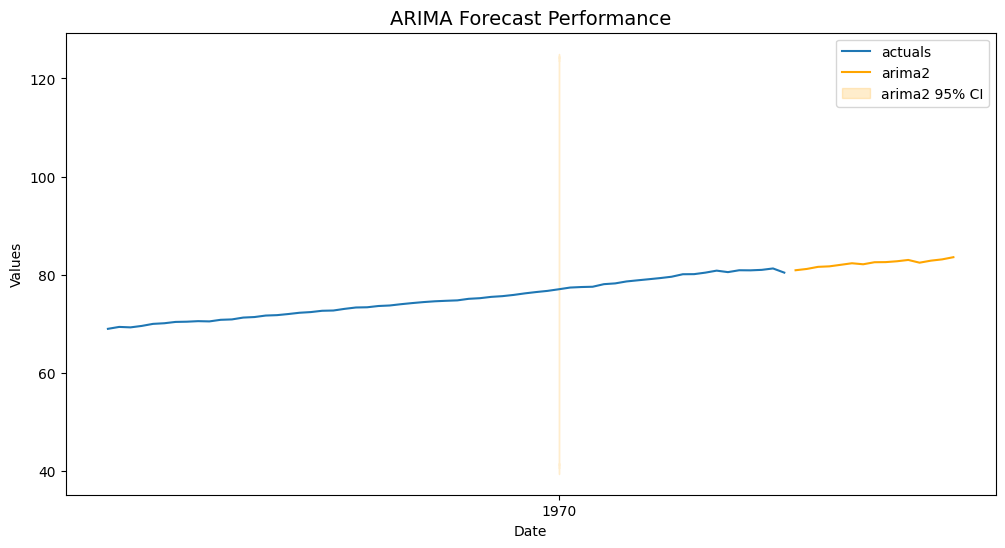

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                   61
Model:             ARIMA(1, 0, 1)x(2, 1, 1, 12)   Log Likelihood                   1.110
Date:                          Fri, 13 Jan 2023   AIC                              9.779
Time:                                  01:23:45   BIC                             21.130
Sample:                                       0   HQIC                            14.086
                                           - 61                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9981      0.117      8.544      0.000       0.769       1.227
ma.L1         -0.2201      0.335     -0.657      0.511      -0.877       0.437
ar.S.L12       0.6930     36.593      0.019      0.985     -71.027      72.414
ar.S.L24       0.2663     10.638      0.025      0.980     -20.583      21.116
ma.S.L12      -0.9707     36.917     -0.026      0.979     -73.328      71.386
sigma2         0.0499      0.008      6.144      0.000       0.034       0.066
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):               183.41
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               3.13   Skew:                            -2.04
Prob(H) (two-sided):                  0.03   Kurtosis:                        11.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
# Forecast
f.manual_forecast(order=(1,0,1),seasonal_order=(2,1,1,12),call_me='arima2')

# View test results
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

# View forecast results
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

# See summary stats
f.regr.summary()


Форкаст для **PER**

In [63]:
model = ARIMA(data_cols['PER'], order=(1, 0, 0)) #p=1, q=0, d=0
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    PER   No. Observations:                   61
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -48.312
Date:                Fri, 13 Jan 2023   AIC                            102.625
Time:                        01:24:31   BIC                            108.957
Sample:                             0   HQIC                           105.106
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.5222     14.557      4.295      0.000      33.991      91.053
ar.L1          0.9994      0.012     81.813      0.000       0.975       1.023
sigma2         0.2558      0.181      1.416      0.1

In [79]:
f = Forecaster(y=data_cols['PER'], current_dates=data_cols.index)

In [80]:
f.generate_future_dates(15) 
f.set_test_length(.2) # 20% test set
f.set_estimator('arima') # set arima
f.manual_forecast(call_me='arima1') # forecast with arima

In [81]:
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: -2.17
the p-value is 0.2184
the series is not stationary
----------------------------------------------------------------------------------------------------


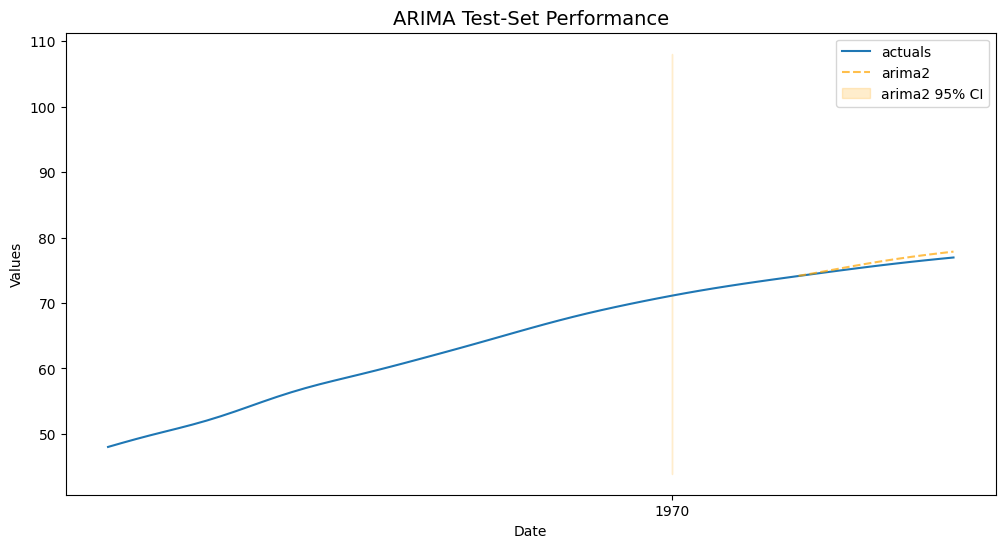

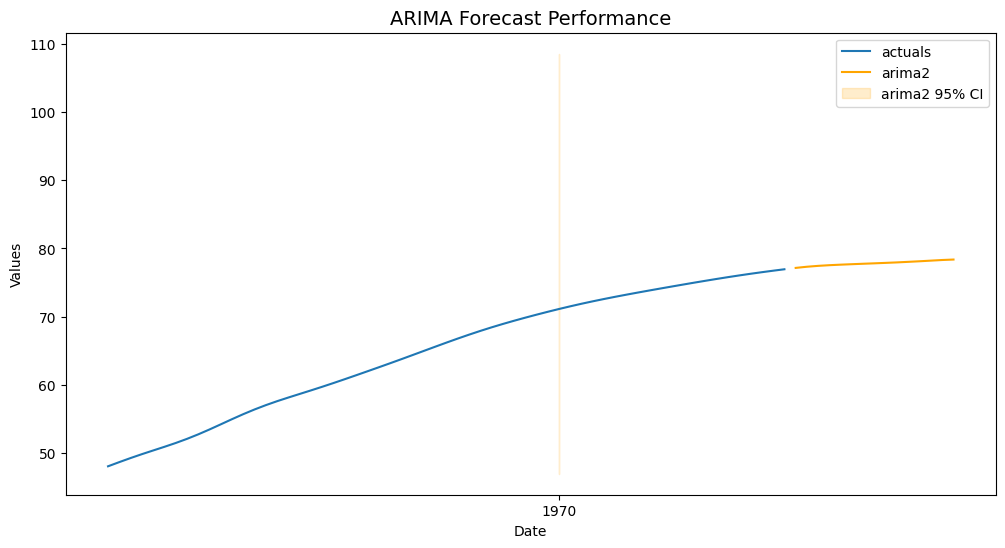

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                   61
Model:             ARIMA(1, 0, 1)x(2, 1, 1, 12)   Log Likelihood                  63.184
Date:                          Fri, 13 Jan 2023   AIC                           -114.368
Time:                                  01:26:59   BIC                           -103.018
Sample:                                       0   HQIC                          -110.062
                                           - 61                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9967      0.006    175.904      0.000       0.986       1.008
ma.L1          0.9995      6.432      0.155      0.877     -11.607      13.606
ar.S.L12      -0.2436      0.759     -0.321      0.748      -1.731       1.244
ar.S.L24       0.7507      0.306      2.452      0.014       0.151       1.351
ma.S.L12       0.9063      7.498      0.121      0.904     -13.789      15.601
sigma2         0.0021      0.016      0.131      0.896      -0.029       0.033
===================================================================================
Ljung-Box (L1) (Q):                  36.08   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.00   Prob(JB):                         0.73
Heteroskedasticity (H):               0.56   Skew:                             0.27
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
# Forecast
f.manual_forecast(order=(1,0,1),seasonal_order=(2,1,1,12),call_me='arima2')

# View test results
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

# View forecast results
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

# See summary stats
f.regr.summary()

### Завдання 6.
Обрати ряд 167 та виконати Exponential
smoothing. Виконати прогнозування від 5 до 10 значень показника.

В електронний звіт додати результати оцінювання параметрів
згладжування та графіки часового ряду разом з прогнозованими
значеннями для моделей згладжування.

**Exponential smooothing**

In [83]:
def simple_exp_smooth(d,extra_periods=1,alpha=0.4):  
    d = np.array(d)
    cols = len(d) 
    d = np.append(d,[np.nan]*extra_periods) 
    f = np.full(cols+extra_periods,np.nan)  
    f[1] = d[0]  
    
    for t in range(2,cols+1):      
        f[t] = alpha*d[t-1]+(1-alpha)*f[t-1]  
        
    df = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Error":d-f})
    return df

In [87]:
smoothed = simple_exp_smooth(data_cols['PER'])["Forecast"]

In [ ]:
smoothed.iloc[0]=data_cols['PER'].iloc[0]

In [93]:
f = Forecaster(y=smoothed[:-1], current_dates=data_cols.index)

In [95]:
f.generate_future_dates(15) 
f.set_test_length(.2) # 20% test set
f.set_estimator('arima') # set arima
f.manual_forecast(call_me='arima1') # forecast with arima

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-54.419, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-148.829, Time=0.42 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=78.676, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-147.719, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-146.986, Time=0.71 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-148.404, Time=0.42 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-146.191, Time=0.63 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-58.842, Time=0.15 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=-177.644, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=-215.738, Time=0.18 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=

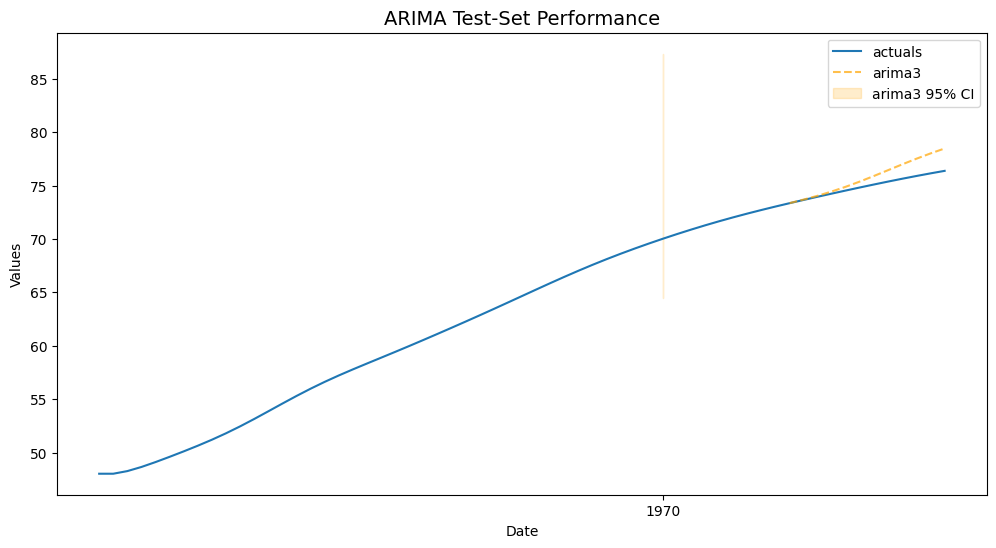

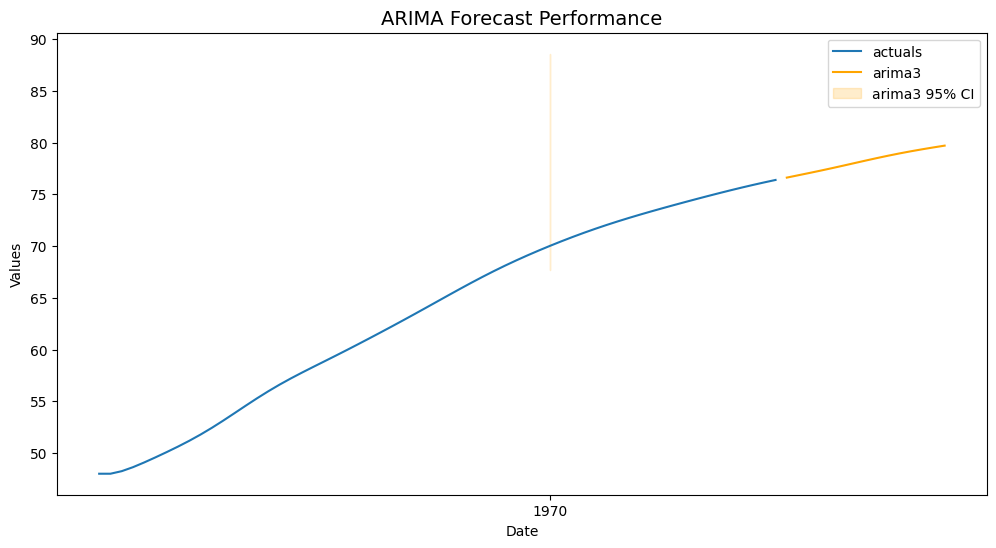

In [105]:
auto_arima(
    f,
    start_P=1,
    start_q=0,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2, 
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [97]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   61
Model:                 ARIMA(4, 1, 2)   Log Likelihood                 229.889
Date:                Fri, 13 Jan 2023   AIC                           -445.778
Time:                        03:43:38   BIC                           -431.118
Sample:                             0   HQIC                          -440.044
                                 - 61                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          3.5206      0.094     37.259      0.000       3.335       3.706
ar.L2         -4.8516      0.217    -22.379      0.000      -5.276      -4.427
ar.L3          3.1084      0.167     18.618      0.000       2.781       3.436
ar.L4         -0.7786      0.046    -17.081      0.000      -0.868      -0.689
ma.L1          0.7865      0.142      5.543      0.000       0.508       1.065
ma.L2          0.4676      0.237      1.971      0.049       0.003       0.933
sigma2      1.802e-05   4.77e-06      3.776      0.000    8.67e-06    2.74e-05
===================================================================================
Ljung-Box (L1) (Q):                  39.69   Jarque-Bera (JB):               131.36
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
def test_export_summaries(f):
    """ exports the relevant statisitcal information of the test-set results for the last model run
    """
    return f.export('model_summaries',determine_best_by='TestSetMAPE')[
        [
            'ModelNickname',
            'HyperParams',
            'TestSetMAPE',
            'TestSetR2',
            'InSampleMAPE',
            'InSampleR2'
        ]
    ]

In [107]:
test_export_summaries(f)

,ModelNickname,HyperParams,TestSetMAPE,TestSetR2,InSampleMAPE,InSampleR2
0,arima3,"{'order': (4, 1, 2), 'seasonal_order': (0, 0, ...",0.011067,-0.335755,0.016558,5.436222e-01
1,arima1,{},0.187848,-217.737513,0.131884,-3.039791e-13


### Висновки


Під час виконання роботи, було побудовано грфіки динаміки рядів, отримано описові статистики, побудовано графіки автокореляції. Побудовано згладжені графіки. Запропоновано параметри p та q моделі ARIMA. Отримано форкаст та побудовано графік ряду з прогнозованим значенням. Виконано експоненціальне згладжування та прогнозування, побудовано графіки.